#**NEURAL** **NETWORKS**

In [43]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import LabelEncoder, StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt


In [44]:
from google.colab import files
uploaded=files.upload()

Saving forestfires.csv to forestfires (1).csv


In [45]:
data = pd.read_csv("forestfires.csv")
# Encode categorical variables
categorical_features = ['month','day','size_category']
for feature in categorical_features:
    encoder = LabelEncoder()
    data[feature] = encoder.fit_transform(data[feature])

In [46]:
data.dropna(inplace=True)
scaler = StandardScaler()
data[data.columns[1:]] = scaler.fit_transform(data[data.columns[1:]])

In [47]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 31 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   month          517 non-null    int64  
 1   day            517 non-null    float64
 2   FFMC           517 non-null    float64
 3   DMC            517 non-null    float64
 4   DC             517 non-null    float64
 5   ISI            517 non-null    float64
 6   temp           517 non-null    float64
 7   RH             517 non-null    float64
 8   wind           517 non-null    float64
 9   rain           517 non-null    float64
 10  area           517 non-null    float64
 11  dayfri         517 non-null    float64
 12  daymon         517 non-null    float64
 13  daysat         517 non-null    float64
 14  daysun         517 non-null    float64
 15  daythu         517 non-null    float64
 16  daytue         517 non-null    float64
 17  daywed         517 non-null    float64
 18  monthapr  

In [48]:
print(data.columns)

Index(['month', 'day', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind',
       'rain', 'area', 'dayfri', 'daymon', 'daysat', 'daysun', 'daythu',
       'daytue', 'daywed', 'monthapr', 'monthaug', 'monthdec', 'monthfeb',
       'monthjan', 'monthjul', 'monthjun', 'monthmar', 'monthmay', 'monthnov',
       'monthoct', 'monthsep', 'size_category'],
      dtype='object')


In [49]:
# Split the data into training and testing sets
X = data.drop('area', axis=1)
y = data['area']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [50]:
# Train the neural network
model = MLPRegressor(hidden_layer_sizes=(100, 50), max_iter=1000)
model.fit(X_train, y_train)

MLPRegressor(hidden_layer_sizes=(100, 50), max_iter=1000)

In [51]:
# Evaluate the neural network
score = model.score(X_test, y_test)
print('R-squared:', score)

R-squared: 0.09696226524131268


In [52]:
# Make predictions
y_pred = model.predict(X_test)

In [53]:
# Calculate evaluation metrics
mae = np.mean(np.abs(y_pred - y_test))
rmse = np.sqrt(np.mean((y_pred - y_test) ** 2))
print('MAE:', mae)
print('RMSE:', rmse)

MAE: 0.4236736364416999
RMSE: 1.6223738773281975


In [83]:
data = pd.read_csv("forestfires.csv")
data.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small


sun    95
fri    85
sat    84
mon    74
tue    64
thu    61
wed    54
Name: day, dtype: int64


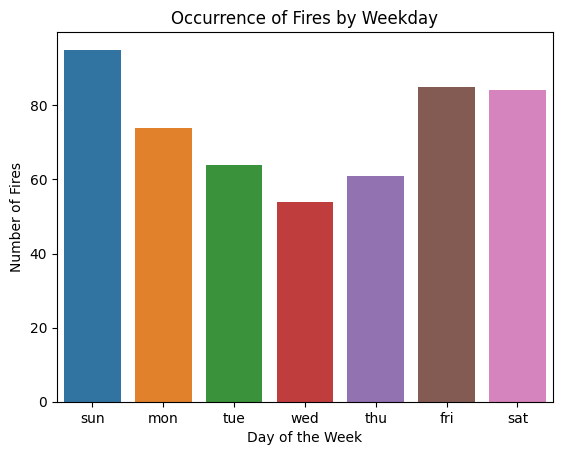

In [89]:
import seaborn as sns

# Create a bar chart to visualize the distribution of fires by day of the week
print(data['day'].value_counts())
chart=sns.barplot(x=data['day'].value_counts().index, y=data['day'].value_counts(), order=['sun', 'mon', 'tue', 'wed', 'thu', 'fri', 'sat'])
chart.set_xlabel('Day of the Week')
chart.set_ylabel('Number of Fires')
chart.set_title('Occurrence of Fires by Weekday')

plt.show()

aug    184
sep    172
mar     54
jul     32
feb     20
jun     17
oct     15
apr      9
dec      9
jan      2
may      2
nov      1
Name: month, dtype: int64


Text(0.5, 1.0, 'Occurrence of Fires by months')

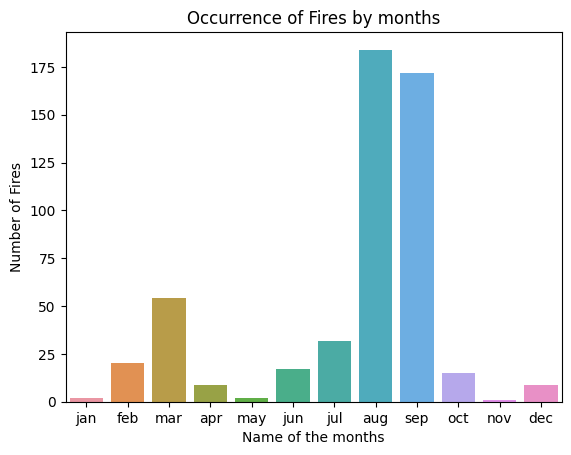

In [99]:
print(data['month'].value_counts())
chart=sns.barplot(x=data['month'].value_counts().index, y=data['month'].value_counts(), order=['jan','feb','mar','apr','may','jun','jul','aug','sep','oct','nov','dec'])
chart.set_xlabel('Name of the months')
chart.set_ylabel('Number of Fires')
chart.set_title('Occurrence of Fires by months')


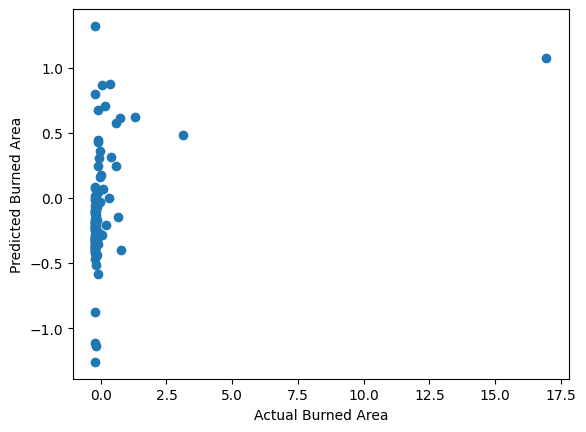

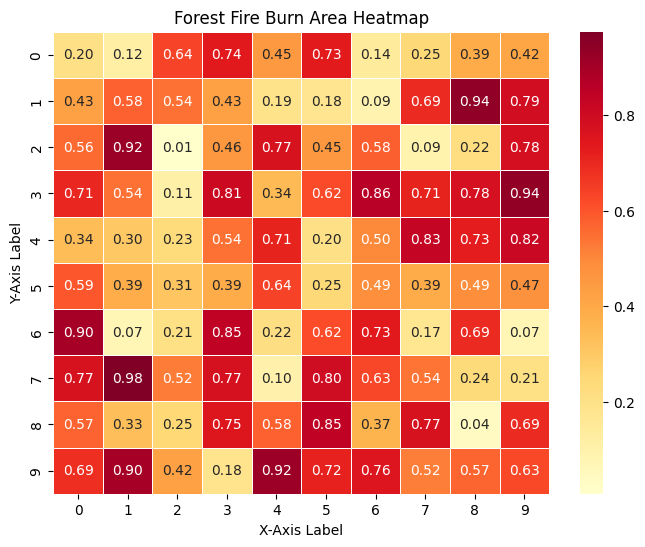

In [100]:
# Visualize the results
import matplotlib.pyplot as plt
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Burned Area')
plt.ylabel('Predicted Burned Area')

area_data=np.random.rand(10,10)
# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(area_data, cmap='YlOrRd', annot=True, fmt=".2f", linewidths=.5)

# Add labels and title
plt.xlabel('X-Axis Label')
plt.ylabel('Y-Axis Label')
plt.title('Forest Fire Burn Area Heatmap')

plt.show()

HENCE we can say that maximum fire brust out on day FRIDAY,SATURDAY,SUNDAY and the pick month of maximum fire are AUG and SEP
And we can clearly see the burn area in above map

# **Q2  GAS-TURBINE ****

In [13]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [1]:
from google.colab import files
uploaded=files.upload()

Saving gas_turbines.csv to gas_turbines.csv


In [4]:
df = pd.read_csv("gas_turbines.csv")
df

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,6.8594,1007.9,96.799,3.5000,19.663,1059.2,550.00,114.70,10.605,3.1547,82.722
1,6.7850,1008.4,97.118,3.4998,19.728,1059.3,550.00,114.72,10.598,3.2363,82.776
2,6.8977,1008.8,95.939,3.4824,19.779,1059.4,549.87,114.71,10.601,3.2012,82.468
3,7.0569,1009.2,95.249,3.4805,19.792,1059.6,549.99,114.72,10.606,3.1923,82.670
4,7.3978,1009.7,95.150,3.4976,19.765,1059.7,549.98,114.72,10.612,3.2484,82.311
...,...,...,...,...,...,...,...,...,...,...,...
15034,9.0301,1005.6,98.460,3.5421,19.164,1049.7,546.21,111.61,10.400,4.5186,79.559
15035,7.8879,1005.9,99.093,3.5059,19.414,1046.3,543.22,111.78,10.433,4.8470,79.917
15036,7.2647,1006.3,99.496,3.4770,19.530,1037.7,537.32,110.19,10.483,7.9632,90.912
15037,7.0060,1006.8,99.008,3.4486,19.377,1043.2,541.24,110.74,10.533,6.2494,93.227


In [5]:
df.head()

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,6.8594,1007.9,96.799,3.5000,19.663,1059.2,550.00,114.70,10.605,3.1547,82.722
1,6.7850,1008.4,97.118,3.4998,19.728,1059.3,550.00,114.72,10.598,3.2363,82.776
2,6.8977,1008.8,95.939,3.4824,19.779,1059.4,549.87,114.71,10.601,3.2012,82.468
3,7.0569,1009.2,95.249,3.4805,19.792,1059.6,549.99,114.72,10.606,3.1923,82.670
4,7.3978,1009.7,95.150,3.4976,19.765,1059.7,549.98,114.72,10.612,3.2484,82.311


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15039 entries, 0 to 15038
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      15039 non-null  float64
 1   AP      15039 non-null  float64
 2   AH      15039 non-null  float64
 3   AFDP    15039 non-null  float64
 4   GTEP    15039 non-null  float64
 5   TIT     15039 non-null  float64
 6   TAT     15039 non-null  float64
 7   TEY     15039 non-null  float64
 8   CDP     15039 non-null  float64
 9   CO      15039 non-null  float64
 10  NOX     15039 non-null  float64
dtypes: float64(11)
memory usage: 1.3 MB


In [7]:
# Handle missing values
df.dropna(inplace=True)

In [8]:
# Normalize the sensor measurements
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df.drop('TEY', axis=1)), columns=df.drop('TEY', axis=1).columns)

In [9]:
# Exploratory data analysis
# Calculate summary statistics
print("Summary statistics:")
print(df_scaled.describe())

Summary statistics:
                 AT            AP            AH          AFDP          GTEP  \
count  1.503900e+04  1.503900e+04  1.503900e+04  1.503900e+04  1.503900e+04   
mean   4.913654e-16 -1.875504e-14  2.570219e-16  1.511894e-16 -7.559468e-17   
std    1.000033e+00  1.000033e+00  1.000033e+00  1.000033e+00  1.000033e+00   
min   -2.276462e+00 -4.266288e+00 -3.536594e+00 -2.779497e+00 -1.806771e+00   
25%   -8.392292e-01 -6.706510e-01 -6.796337e-01 -6.266930e-01 -5.091458e-01   
50%    5.566605e-02 -6.227861e-02  2.277844e-01 -1.854065e-02 -8.075681e-02   
75%    8.051309e-01  5.772924e-01  7.916582e-01  4.612196e-01  4.228638e-01   
max    2.266234e+00  3.275970e+00  1.528011e+00  4.486233e+00  2.871006e+00   

                TIT           TAT           CDP            CO           NOX  
count  1.503900e+04  1.503900e+04  1.503900e+04  1.503900e+04  1.503900e+04  
mean  -3.260021e-15  1.640405e-15  1.965462e-16  3.779734e-17  4.233302e-16  
std    1.000033e+00  1.000033e+00 

In [15]:
# Feature selection
# Select ambient variables with high correlation to TEY
#corr = df_scaled.corr()
#selected_features = corr['TEY'].abs().sort_values(ascending=False)[1:10].index.tolist()

In [16]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df_scaled, df['TEY'], test_size=0.2, random_state=42)

In [20]:
# Machine learning model training and evaluation
# Linear regression
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
print("Linear regression:")
print("Mean squared error:", mean_squared_error(y_test, y_pred_lr))
print("Root mean squared error:", np.sqrt(mean_squared_error(y_test, y_pred_lr)))
print("R-squared:", r2_score(y_test, y_pred_lr))

Linear regression:
Mean squared error: 0.48866845094026157
Root mean squared error: 0.6990482465039602
R-squared: 0.9980483677582709


In [21]:
# Decision tree regressor
dt = DecisionTreeRegressor(random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)
print("Decision tree regressor:")
print("Mean squared error:", mean_squared_error(y_test, y_pred_dt))
print("Root mean squared error:", np.sqrt(mean_squared_error(y_test, y_pred_dt)))
print("R-squared:", r2_score(y_test, y_pred_dt))

Decision tree regressor:
Mean squared error: 0.8273706781914899
Root mean squared error: 0.9095991854610963
R-squared: 0.9966956669940266


In [22]:
# Random forest regressor
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
print("Random forest regressor:")
print("Mean squared error:", mean_squared_error(y_test, y_pred_rf))
print("Root mean squared error:", np.sqrt(mean_squared_error(y_test, y_pred_rf)))
print("R-squared:", r2_score(y_test, y_pred_rf))

Random forest regressor:
Mean squared error: 0.3851002297639619
Root mean squared error: 0.6205644444890167
R-squared: 0.9984619960153791


In [23]:
# Gradient boosting regressor
gbr = GradientBoostingRegressor(random_state=42)
gbr.fit(X_train, y_train)
y_pred_gbr = gbr.predict(X_test)
print("Gradient boosting regressor:")
print("Mean squared error:", mean_squared_error(y_test, y_pred_gbr))
print("Root mean squared error:", np.sqrt(mean_squared_error(y_test, y_pred_gbr)))
print("R-squared:", r2_score(y_test, y_pred_gbr))

Gradient boosting regressor:
Mean squared error: 0.7197589012164834
Root mean squared error: 0.8483860567079609
R-squared: 0.997125444306497


In [24]:
# Neural network model training and evaluation
# Define the neural network architecture
model = MLPRegressor(hidden_layer_sizes=(100, 50), activation='relu', solver='adam', max_iter=1000)

In [25]:
# Train the model
model.fit(X_train, y_train)

MLPRegressor(hidden_layer_sizes=(100, 50), max_iter=1000)

In [19]:
# Make predictions on the test set
y_pred = model.predict(X_test)

In [ ]:
# Evaluate the model's performance
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
print("Mean squared error:", mse)
print("Root mean squared error:", rmse)
print("R-squared:", r2)

In [26]:
import pandas as pd
import matplotlib.pyplot as plt


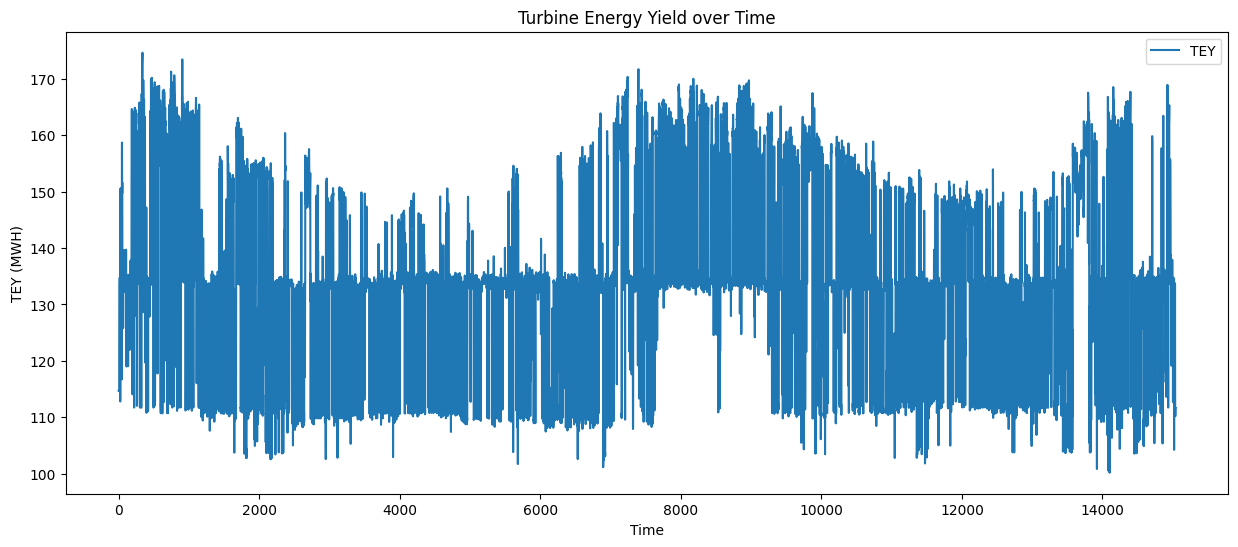

In [27]:
# Plot the Turbine Energy Yield (TEY) over time
plt.figure(figsize=(15, 6))
plt.plot(df['TEY'], label='TEY')
plt.xlabel('Time')
plt.ylabel('TEY (MWH)')
plt.title('Turbine Energy Yield over Time')
plt.legend()
plt.show()

#Heatmap for AT

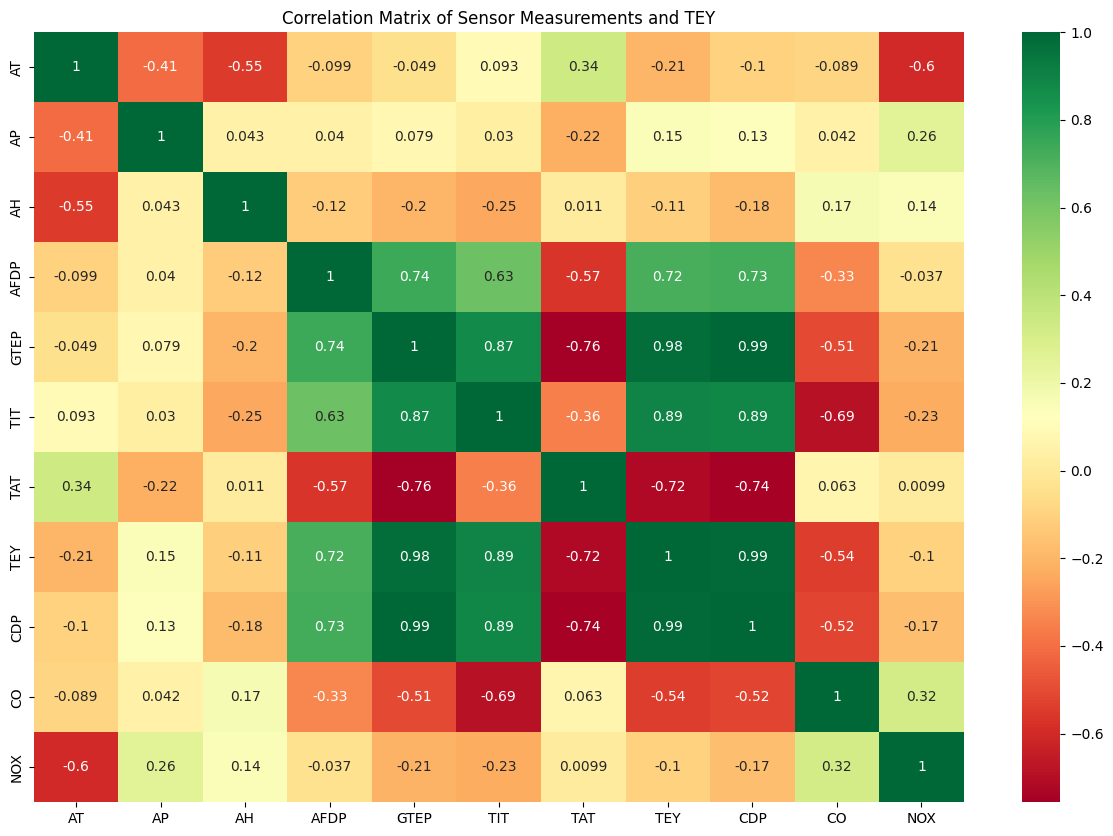

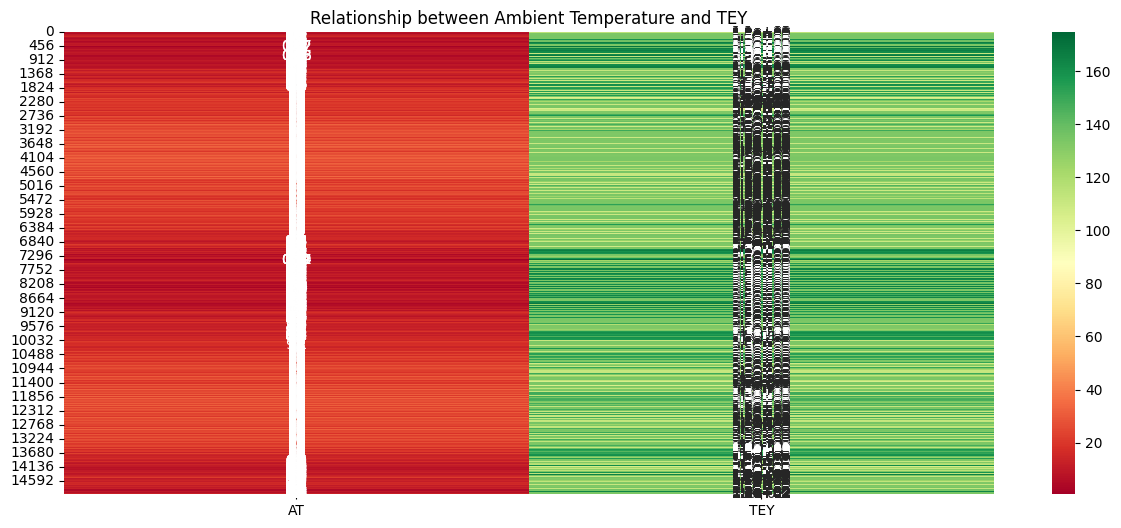

In [34]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# Create a heatmap of the correlation matrix of the sensor measurements and TEY
corr = df.corr()
plt.figure(figsize=(15, 10))
sns.heatmap(corr, annot=True, cmap='RdYlGn')
plt.title('Correlation Matrix of Sensor Measurements and TEY')
plt.show()

# Create a heatmap of the relationship between Ambient Temperature (AT) and TEY
plt.figure(figsize=(15, 6))
sns.heatmap(df[['AT', 'TEY']], annot=True, cmap='RdYlGn')
plt.title('Relationship between Ambient Temperature and TEY')
plt.show()

#PLOT OF RELATIONSHIPS GRAPH BETWEEN
#TEY AND CO(Carbon Monoxide) & NOX(Nitrogen Oxides)

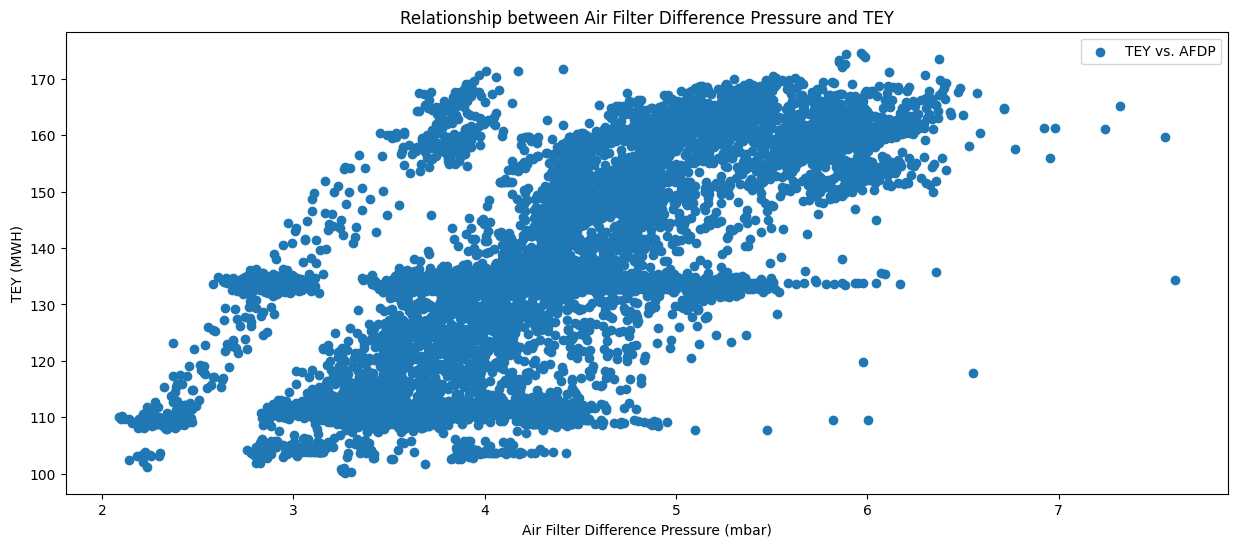

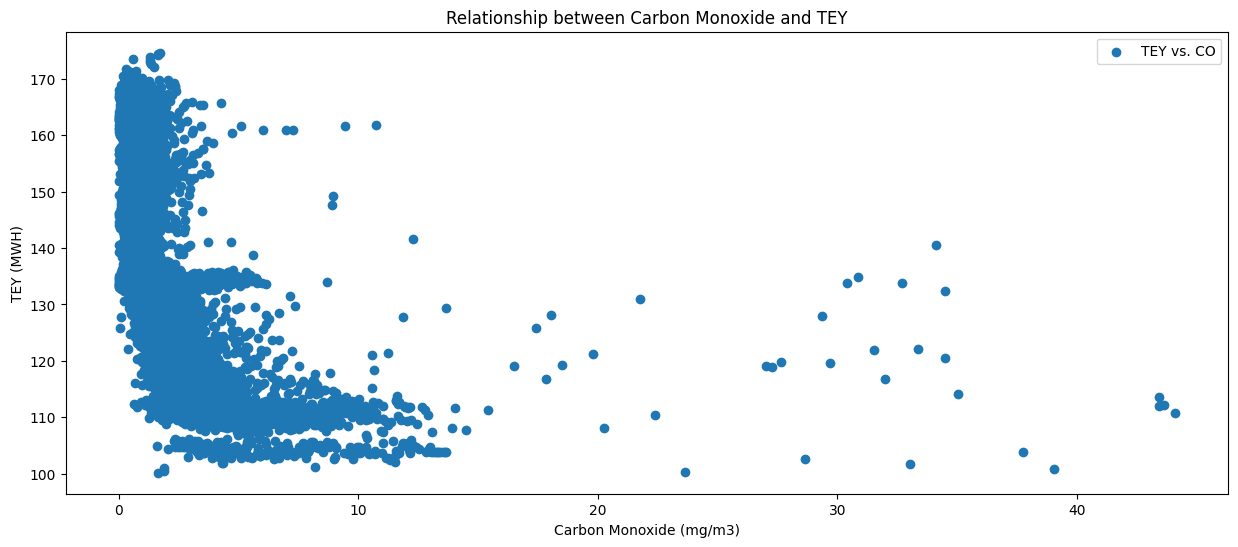

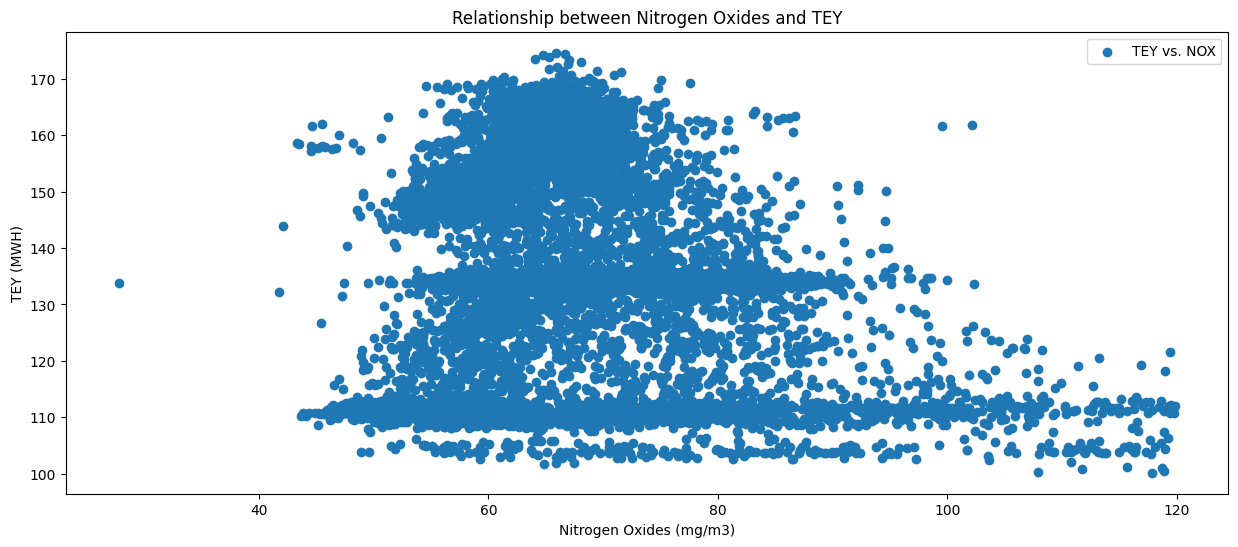

In [35]:
# Plot the relationship between Air Filter Difference Pressure (AFDP) and TEY
plt.figure(figsize=(15, 6))
plt.scatter(df['AFDP'], df['TEY'], label='TEY vs. AFDP')
plt.xlabel('Air Filter Difference Pressure (mbar)')
plt.ylabel('TEY (MWH)')
plt.title('Relationship between Air Filter Difference Pressure and TEY')
plt.legend()
plt.show()

# Plot the relationship between Carbon Monoxide (CO) and TEY
plt.figure(figsize=(15, 6))
plt.scatter(df['CO'], df['TEY'], label='TEY vs. CO')
plt.xlabel('Carbon Monoxide (mg/m3)')
plt.ylabel('TEY (MWH)')
plt.title('Relationship between Carbon Monoxide and TEY')
plt.legend()
plt.show()

# Plot the relationship between Nitrogen Oxides (NOx) and TEY
plt.figure(figsize=(15, 6))
plt.scatter(df['NOX'], df['TEY'], label='TEY vs. NOX')
plt.xlabel('Nitrogen Oxides (mg/m3)')
plt.ylabel('TEY (MWH)')
plt.title('Relationship between Nitrogen Oxides and TEY')
plt.legend()
plt.show()